In [1]:
# load modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC, LogisticRegression
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Check columns:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  


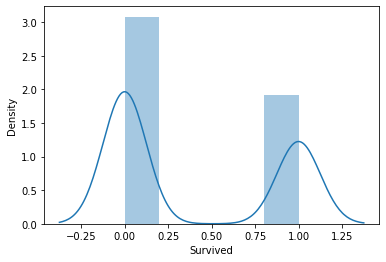

In [19]:
# read train data
df_train = pd.read_csv("./data/train.csv")
df_train_copy = df_train.copy()
df_test_copy = pd.read_csv("./data/test.csv")
print("Check columns:")
print(df_train.columns)
print(df_train.head(4))
print("==============================")
print(df_train.describe())
print("==============================")
print("Datatype Summary:")
print(df_train.dtypes)
print("==============================")
print("NaN Summary:")
print(df_train.isna().sum())
print("Some missing in Age; A lot missing in Cabin (may be dropped).")
print("==============================")
sns.distplot(df_train["Survived"])
print("More people died than survived in the shipwreck.")

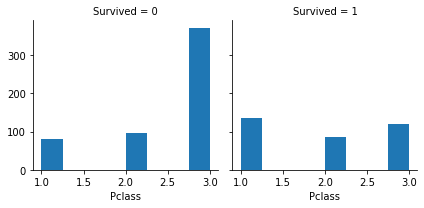

In [20]:
# investigate Pclass
print("==============================")
grid = sns.FacetGrid(df_train, col="Survived")
grid.map(plt.hist, "Pclass", bins=8)


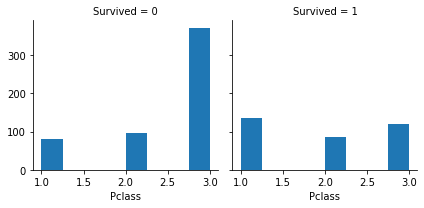

In [4]:
# investigate Embarked
print(df_train["Embarked"].describe())
# label encode
le_embarked = LabelEncoder()
df_train["Embarked"] = le_ticket.fit_transform(df_train["Embarked"])
grid = sns.FacetGrid(df_train, col="Survived")
grid.map(plt.hist, "Embarked", bins=8)

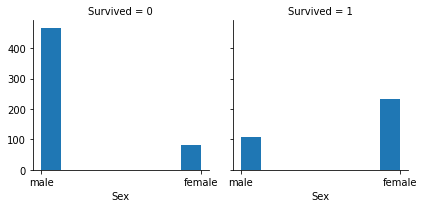

In [5]:
# investigate Sex
grid = sns.FacetGrid(df_train, col="Survived")
grid.map(plt.hist, "Sex", bins=8)

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object


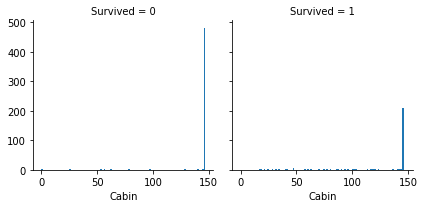

In [6]:
# investigate Cabin
print(df_train["Cabin"].describe())
df_train["Cabin"] = df_train["Cabin"].fillna("None")
# label encode
le_cabin = LabelEncoder()
df_train["Cabin"] = le_cabin.fit_transform(df_train["Cabin"])
grid = sns.FacetGrid(df_train, col="Survived")
grid.map(plt.hist, "Cabin", bins=100)

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object


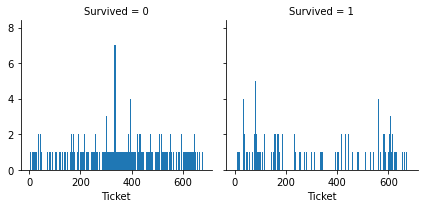

In [7]:
# investigate Ticket
print(df_train["Ticket"].describe())
# label encode
le_ticket = LabelEncoder()
df_train["Ticket"] = le_ticket.fit_transform(df_train["Ticket"])
grid = sns.FacetGrid(df_train, col="Survived")
grid.map(plt.hist, "Ticket", bins=600)

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


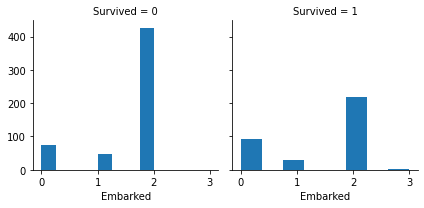

In [8]:
# investigate Age
grid = sns.FacetGrid(df_train, col="Survived")
grid.map(plt.hist, "Age", bins=32)


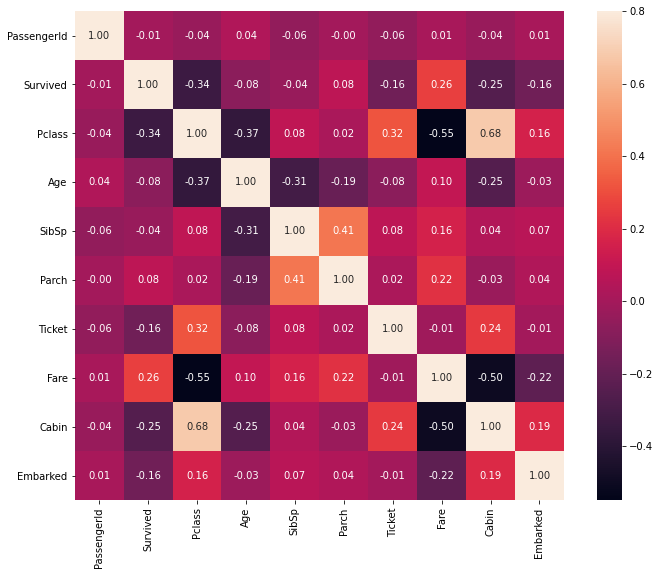

In [9]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cbar=True, annot=True, fmt='.2f');

In [10]:
# drop Cabin, Ticket, Embarked, PassengerId, Name
vars_to_drop = ["Cabin", "Ticket", "Fare", "Embarked", "PassengerId", "Name", "Age"]
df_train = df_train_copy.drop(vars_to_drop, axis=1)
df_test  = df_test_copy.drop(vars_to_drop, axis=1)

df_train_na = (df_train.isnull().sum() / len(df_train)) * 100
df_train_missing = pd.DataFrame({"Missing Ratio":df_train_na})
print("Train Data:")
print(df_train_missing)
df_test_na = (df_test.isnull().sum() / len(df_test)) * 100
df_test_missing = pd.DataFrame({"Missing Ratio":df_test_na})
print("Test Data:")
print(df_test_missing)

Train Data:
          Missing Ratio
Survived            0.0
Pclass              0.0
Sex                 0.0
SibSp               0.0
Parch               0.0
Test Data:
        Missing Ratio
Pclass            0.0
Sex               0.0
SibSp             0.0
Parch             0.0


In [11]:
# cleaning
le_sex = LabelEncoder()
df_train["Sex"] = le_sex.fit_transform(df_train["Sex"])
df_test["Sex"] = le_sex.fit(df_test["Sex"])

In [12]:
# data
Y_train = df_train["Survived"]
X_train = df_train.drop(["Survived"], axis=1)
X_test = df_test.copy()

# model
model = RandomForestClassifier()

model.fit(X_train, Y_train)


model.score(X_train, Y_train)

0.8170594837261503

In [13]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = df_train["Survived"]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, df_train.drop(["Survived"], axis=1), df_train["Survived"], cv = cv_split)

    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(df_train.drop(["Survived"], axis=1), df_train["Survived"])
    MLA_predict[MLA_name] = alg.predict(df_train.drop(["Survived"], axis=1) )
    
    row_index += 1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

[17:50:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:50:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.802612,0.041114,0.040912
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.8,0.037529,0.032801
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.798134,0.051163,0.116745
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.796269,0.043412,0.016622
19,LinearDiscriminantAnalysis,"{'covariance_estimator': None, 'n_components':...",0.79291,0.041659,0.002557
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.79291,0.041659,0.00349
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.791418,0.042611,0.056138
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.790299,0.053169,0.063294
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.788806,0.057341,0.050464
11,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.78806,0.043006,0.002529
